# **Multiclass Image Classification - Rock Paper Scissors Dataset**

> [**Kaggle Dataset**](https://www.kaggle.com/datasets/sanikamal/rock-paper-scissors-dataset)

In [ ]:
# Install Kaggle.
!pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
# Files Upload.
from google.colab import files

files.upload()

In [ ]:
# Create a Kaggle Folder.
!mkdir ~/.kaggle

# Copy the kaggle.json to the folder created.
!cp kaggle.json ~/.kaggle/

# Permission for the json file to act.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Dataset Download.
!kaggle datasets download -d sanikamal/rock-paper-scissors-dataset

In [ ]:
# Unzip Dataset.
!unzip rock-paper-scissors-dataset.zip

## **Multiclass Classification with Image Augmentation**

In [ ]:
# Import Library.
import os, random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import warnings

warnings.filterwarnings("ignore")

base_dir = os.path.join("/content/Rock-Paper-Scissors")
print("Base Directory --> ", os.listdir(base_dir))

Base Directory -->  ['validation', 'test', 'train']


#### **Define Dataset Path.**

In [ ]:
# Train Set.
train_dir = os.path.join("/content/Rock-Paper-Scissors/train")
print("Train --> ", os.listdir(train_dir))

# Test Set.
test_dir = os.path.join("/content/Rock-Paper-Scissors/test")
print("Test --> ", os.listdir(test_dir))

# Validation Set.
validation_dir = os.path.join("/content/Rock-Paper-Scissors/validation")
print("Validation --> ", os.listdir(validation_dir)[:5])

Train -->  ['scissors', 'paper', 'rock']
Test -->  ['scissors', 'paper', 'rock']
Validation -->  ['scissors7.png', 'rock2.png', 'rock6.png', 'rock5.png', 'paper4.png']


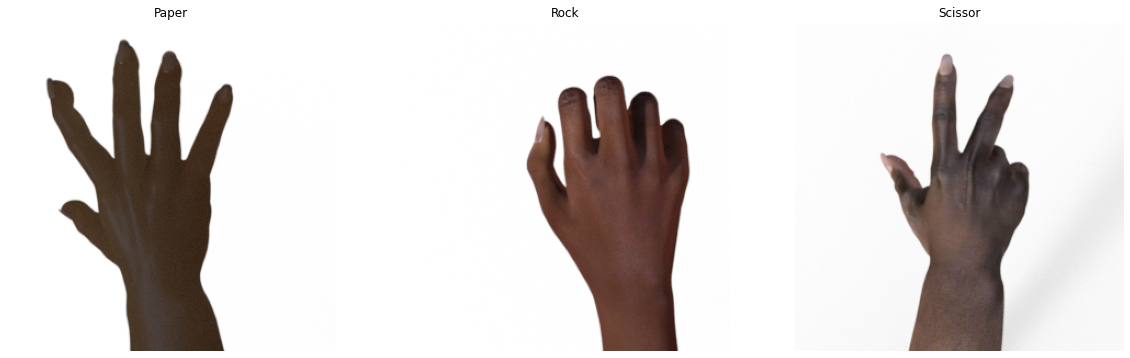

In [ ]:
# Display random images from the dataset.

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

sample_paper = random.choice(os.listdir(train_dir + "/paper"))
image = load_img(train_dir + "/paper/" + sample_paper)
ax[0].imshow(image)
ax[0].set_title("Paper")
ax[0].axis("Off")

sample_rock = random.choice(os.listdir(train_dir + "/rock"))
image = load_img(train_dir + "/rock/" + sample_rock)
ax[1].imshow(image)
ax[1].set_title("Rock")
ax[1].axis("Off")

sample_scissor = random.choice(os.listdir(train_dir + "/scissors"))
image = load_img(train_dir + "/scissors/" + sample_scissor)
ax[2].imshow(image)
ax[2].set_title("Scissor")
ax[2].axis("Off")

plt.show()

#### **Define the CNN Model.**

In [ ]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(
            32, (3, 3), activation="relu", input_shape=(150, 150, 3)
        ),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(3, activation="softmax"),
    ]
)

# Compile the Model.
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get("accuracy") > 0.95:
            print("\nReached > 95% accuracy, so canceling training!")
            self.model.stop_training = True


callbacks = myCallback()

#### **Training & Validation Generator with Image Augmentation.**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), class_mode="categorical", batch_size=20
)

Found 2520 images belonging to 3 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

validation_generator = validation_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), class_mode="categorical", batch_size=20
)

Found 372 images belonging to 3 classes.


#### **Fit the Model.**

In [ ]:
# Fit the Model.
history = model.fit_generator(
    train_generator,
    steps_per_epoch=np.ceil(2520 / 20),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=np.ceil(372 / 20),
    callbacks=[callbacks],
    verbose=2,
)

Epoch 1/10
126/126 - 34s - loss: 1.0263 - accuracy: 0.4575 - val_loss: 0.6899 - val_accuracy: 0.7661 - 34s/epoch - 266ms/step
Epoch 2/10
126/126 - 21s - loss: 0.5494 - accuracy: 0.7734 - val_loss: 0.1530 - val_accuracy: 1.0000 - 21s/epoch - 170ms/step
Epoch 3/10
126/126 - 20s - loss: 0.3245 - accuracy: 0.8810 - val_loss: 0.1217 - val_accuracy: 0.9731 - 20s/epoch - 162ms/step
Epoch 4/10
126/126 - 22s - loss: 0.1917 - accuracy: 0.9361 - val_loss: 0.1731 - val_accuracy: 0.9059 - 22s/epoch - 172ms/step
Epoch 5/10
126/126 - 21s - loss: 0.1613 - accuracy: 0.9429 - val_loss: 0.0633 - val_accuracy: 0.9758 - 21s/epoch - 169ms/step
Epoch 6/10

Reached > 95% accuracy, so canceling training!
126/126 - 20s - loss: 0.1145 - accuracy: 0.9583 - val_loss: 0.1283 - val_accuracy: 0.9597 - 20s/epoch - 161ms/step


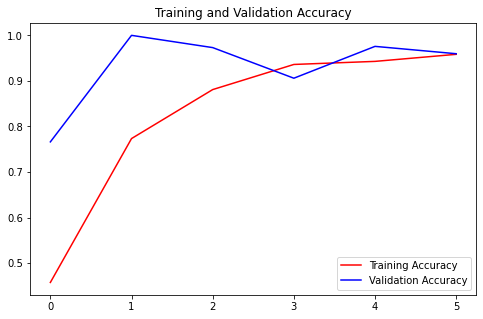

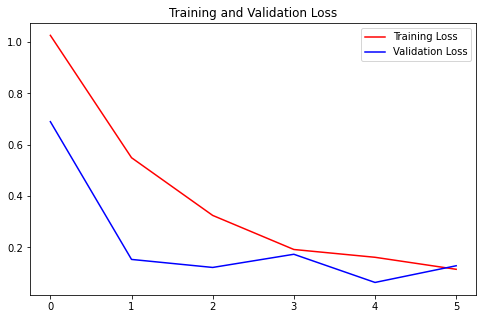

In [ ]:
# Visualize Training Performance.

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.figure(figsize=(8, 5))

plt.plot(epochs, acc, "r", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure(figsize=(8, 5))

plt.plot(epochs, loss, "r", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

#### **Prepare the Test Data.**

In [ ]:
test_img = os.listdir(os.path.join(validation_dir))

test_df = pd.DataFrame({"Image": test_img})
test_df.head()

,Image
0,scissors7.png
1,rock2.png
2,rock6.png
3,rock5.png
4,paper4.png


#### **Test Generator.**

In [ ]:
test_gen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_gen.flow_from_dataframe(
    test_df,
    validation_dir,
    x_col="Image",
    y_col=None,
    class_mode=None,
    target_size=(150, 150),
    batch_size=20,
    shuffle=False,
)

Found 33 validated image filenames.


In [ ]:
# Model Predictions.
predict = model.predict_generator(test_generator, steps=int(np.ceil(33 / 20)))

In [ ]:
# Identify the Class.
label_map = dict((v, k) for k, v in train_generator.class_indices.items())
label_map

{0: 'paper', 1: 'rock', 2: 'scissors'}

In [ ]:
test_df["Label"] = np.argmax(predict, axis=-1)

test_df["Label"] = test_df["Label"].replace(label_map)

test_df.head()

,Image,Label
0,scissors7.png,scissors
1,rock2.png,rock
2,rock6.png,rock
3,rock5.png,rock
4,paper4.png,paper


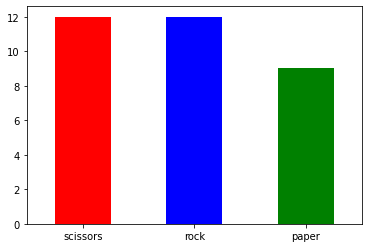

In [ ]:
test_df.Label.value_counts().plot.bar(color=["red", "blue", "green"])
plt.xticks(rotation=0)
plt.show()

#### **Model Performance Result with Unseen Images.**

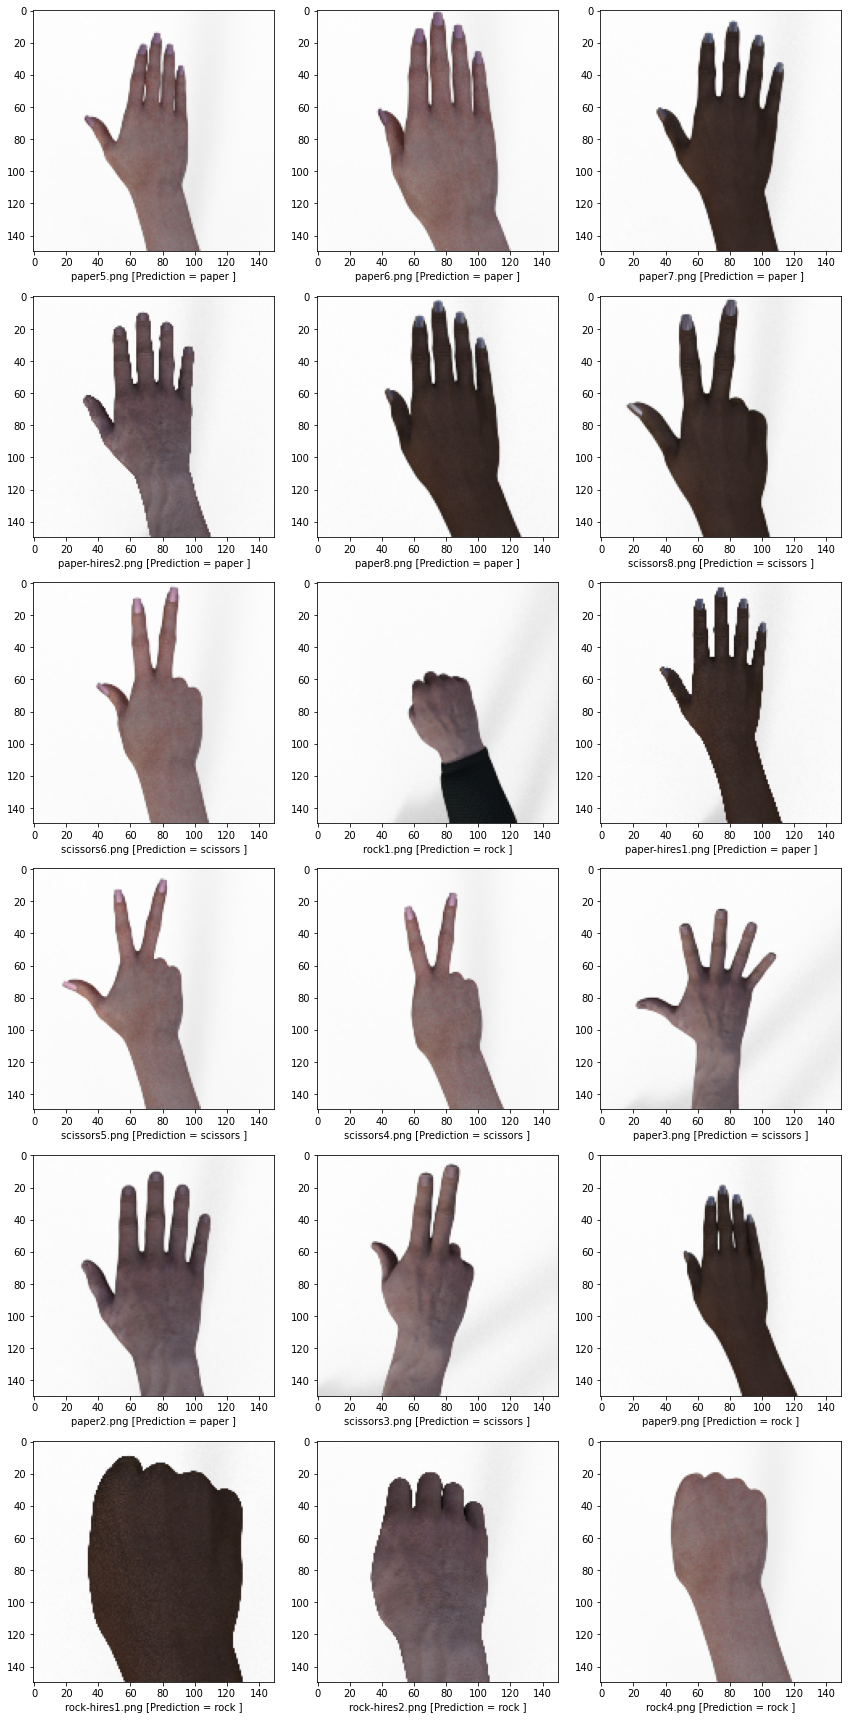

In [ ]:
v = random.randint(0, 25)

sample_test = test_df.iloc[v : (v + 18)].reset_index(drop=True)
sample_test.head()

plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row["Image"]
    category = row["Label"]
    img = load_img(validation_dir + "/" + filename, target_size=(150, 150))
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + " [Prediction = " + "{}".format(category) + " ]")
plt.tight_layout()
plt.show()

In [ ]:
# Model Accuracy.
lis = []
for ind in test_df.index:
    if test_df["Label"][ind] in test_df["Image"][ind]:
        lis.append(1)
    else:
        lis.append(0)

print("Accuracy of the Model on Test Data is {:.2f}".format((sum(lis) / len(lis)) * 100))

Accuracy of the Model on Test Data is 93.94
